# ECE 57000 Assignment 2 Exercises



Name: 

# Important submission information
Please make sure to be careful to specify which pages of the PDF are for which exercises in Gradescope.  This will make grading significantly easier.

**We may assess a 20% penalty for those who do not correctly follow these submission instructions.**

## Exercise 1

In this exercise, you will implement linear regression using the polynomial features and compare results for diferent choices of degrees for the polynomial visually.

### Task 1: Generate the data
The data should be a noisy version of a sin wave i.e
$y = \sin (X) + \epsilon $  where $\epsilon \sim \text{NormalDistribution}(\mu,\sigma)$
1. Generate **50** evenly spaced numbers over the interval $[0,4\pi]$ and store them as a vector called `X`.
2. Generate `y` from `X` by using the equation above with the parameter $\mu=0, \sigma=0.1$
3. Do a scatter plot on `X` and `y` and give the plot and axis reasonable names.


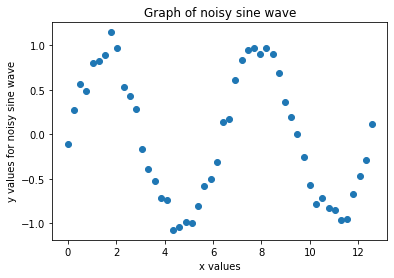

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# <Your code>
X = np.linspace(0, 4 * np.pi, 50)
y = [np.sin(x) + np.random.normal(0, 0.1) for x in X]
plt.scatter(X, y)
plt.xlabel("x values")
plt.ylabel("y values for noisy sine wave")
plt.title("Graph of noisy sine wave")
plt.show()

### Task 2: Fit the data
Now try to use tools in sklearn to fit the data with varying degrees of the polynomial. The general process is:
1. Create an estimator based on pipelining the function **PolynomialFeatures(degree)** and **LinearRegression()** (Read the instruction)
2. Fit the estimator to the data you created in Task 1. (Note the estimator will expect a 2D array so you may have to reshape `X`.)
3. Evaluate your trained estimator by using the given vector **xfit**, and plot the result curve over the scatter plot of your data.
(The plot should look similar to the plot on the part 1 of the instruction)

The output of your code should be a 2 by 2 grid of subplots (see [`plt.subplots`](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.subplots.html) or [`plt.subplot`](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.subplot.html#matplotlib.pyplot.subplot)) where each plot visualizes the mdoel fitted using different polynomial degrees (see above), specifically degrees `[3, 5, 9, 15]` respectively.
Each subplot should be given a reasonable title to identify what it represents.

NOTE: It is perfectly normal if the graph looks crazy for high degrees of polynomial choice.

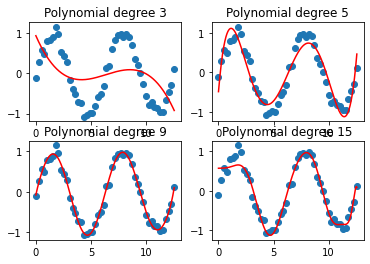

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

xfit = np.linspace(0, 4*np.pi, 1000)
plt.subplots(2,2)
for index, degree in enumerate([3,5,9,15]):
  plt.subplot(2,2,index+1)
  estimator = make_pipeline(PolynomialFeatures(degree), LinearRegression())
  estimator.fit(X[:, np.newaxis], y)
  yfit = estimator.predict(xfit[:, np.newaxis])
  plt.title("Polynomial degree " + str(degree))
  plt.plot(xfit, yfit, 'r')
  plt.scatter(X, y)
    
plt.show()

## Exercise 2: KNN classifier on credit fraud dataset
In this exercise, you will use K-nearest-neighbor method to create a model that is able to detect potential credit card fraud.

### Task 1: Mount your drive
Follow the step on the instructions and mount your google drive on Colab which allows to access the .csv file uploaded on your drive that was included with this assignment.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Task 2: Load and preprocess datasets
In this program we are using a dataset that has the following features:  

V1 | V1 | ... | V10 | Amount | Class 
---|---|---|---|---|---
(float)|(float)|(float)|(float)|(float)|(str)

The first ten features are the top PCA values for certain transaction information. The reason only PCA values are given is to protect private information.
The **Amount** feature is the amount of money in that particular transaction and the **Class** feature contains two classes **safe** and **Fraud**.
Each class has 400 examples, your task is to predict the **Class** feature from all the other features, i.e. determine which transactions are fraudulent or not.

1. Load the given .csv file to the variable **data** by using the function **read_csv()**.
2. Create **X** from **data** simply by dropping the last column (which will be our **y**) of the pandas dataframe, and create **y** by selecting the last column of the pandas data frame.
3. Use **StandardScaler()** and **LabelEncoder()** to preprocess/tranform **X** and **y** respectively.
4. Use **train_test_split** to create the training and test set with 20% of the data be the test data and set the `random_state` to `0`.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

df = pd.read_csv("/content/drive/My Drive/creditcard_ece570.csv")
y = df["Class"]
X = df.drop(["Class"], axis=1)
X = StandardScaler().fit_transform(X)
y = LabelEncoder().fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

print(f'X_train has the shape {X_train.shape}')
print(f'y_train has the shape {y_train.shape}')
print(f'X_test has the shape {X_test.shape}')
print(f'y_test has the shape {y_test.shape}')

X_train has the shape (640, 11)
y_train has the shape (640,)
X_test has the shape (160, 11)
y_test has the shape (160,)


### Task 3: Find the optimal KNN estimator
We need to find the optimal parameters of the KNN estimator (the model selection problem) using cross validation, and then provide a final estimate of the model's generalization performance via the test set.
1. Do a grid search (using the `GridSearchCV` estimator from scikit-learn) to optimize the following hyperparameters for KNN (use estimator `KNeighborsClassifier`) and name your gridsearch object `KNN_GV`:
  * The number of neighbors `n_neighbors = [3,5,7,9,11,13,15]`
  * Type of weights considered `weights = [uniform, distance]`
  * Type of distance considered `metric = [euclidean, manhattan]`
2. Fit your gridsearch by specifying the number of folds to 5 (see `cv` parameter of `GridSearchCV`). (Note: Pass only your training dataset into the `fit` function so that the model selection process doesn't see your test dataset.  `GridSearchCV` will take care of doing cross validation on the training dataset.)
3. Print your best parameters combo (see `best_params_` attribute of KN and the corresponding score on the train and test set.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

grid_params = {
    'n_neighbors': [3,5,7,9,11,13,15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
}

KNN_GV = GridSearchCV(KNeighborsClassifier(), grid_params, cv = 5)

result = KNN_GV.fit(X_train, y_train)
print(f'The best parameters are {result.best_params_}')
train_score = KNN_GV.score(X_train, y_train)
test_score = KNN_GV.score(X_test, y_test)
print(f'Training score is {train_score}, Test score is {test_score}')

The best parameters are {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
Training score is 0.95625, Test score is 0.90625


### Just for fun: Try out different classifiers in scikit-learn to see if you can beat the test set performance of KNN on this dataset
(Please do not include this optional activity in your submission to simplify grading.)

There are many other classifiers in scikit-learn.  A really cool example of many standard classifiers can be seen in the following image from the scikit-learn example on comparing classifiers: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html:

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_classifier_comparison_001.png" />
